## Exploring MODIS Data for Frontal Eddies

- Take the outer shelf constrained by bathymetry.
  - Make a Hovmoller plot of outer shelf chl-a and SST N-S through time.
  - Also make a Hovmoller plot of SLA through time.
  - See how much chl-a varies from E-W across the outer shelf over time
  - Run eddy animation with outer shelf bathymetry to see if they follow along the outer shelf precisely

In [2]:
import numpy as np
import xarray as xr
import os.path as op
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, timedelta, datetime
import cartopy.crs as crs
import hvplot.xarray
import rasterio

In [3]:
# bathymetry fromhttps://download.gebco.net/
bathy = xr.open_dataset('bathymetry/GEBCO_2020_23_Oct_2020_c3e0a2c71e39/gebco_2020_n41.220703125_s24.7412109375_w-82.6611328125_e-59.765625.nc')
bathy

<xarray.Dataset>
Dimensions:    (lat: 3955, lon: 5495)
Coordinates:
  * lat        (lat) float64 24.74 24.75 24.75 24.76 ... 41.21 41.21 41.21 41.22
  * lon        (lon) float64 -82.66 -82.66 -82.65 ... -59.78 -59.77 -59.77
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

In [62]:
bathy_gs = bathy.sel( lat=slice(20, 42), lon=slice(-85,-65))
bathy_gs

<xarray.Dataset>
Dimensions:    (lat: 3955, lon: 4239)
Coordinates:
  * lat        (lat) float64 24.74 24.75 24.75 24.76 ... 41.21 41.21 41.21 41.22
  * lon        (lon) float64 -82.66 -82.66 -82.65 -82.65 ... -65.01 -65.01 -65.0
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

In [30]:
bathy_gs.elevation.values[bathy_gs.elevation.values < -200] = -200

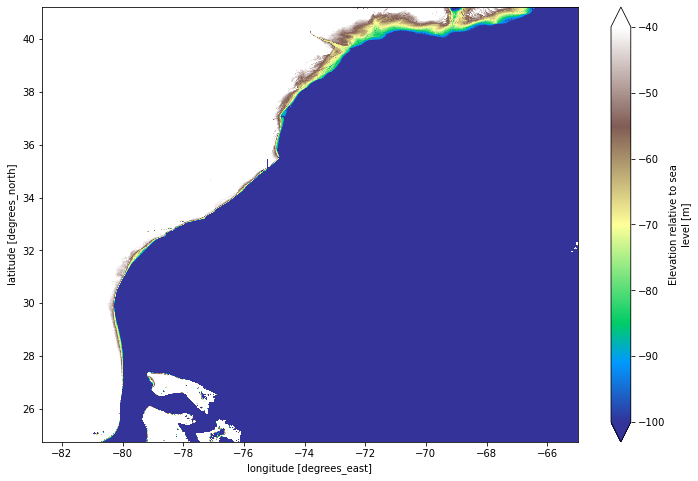

In [14]:
fig,ax = plt.subplots(figsize=(12,8))
bathy_gs.elevation.plot(vmax=-40,vmin=-150,cmap='terrain')

In [31]:
proj = crs.Orthographic(-90, 30)

bathy_gs.elevation.hvplot.quadmesh(
    'lon', 'lat', projection=proj, project=True,
    cmap='terrain', dynamic=True, coastline=True, 
    frame_width=500, logz=False, clim=(0,500), datashade=True)

:DynamicMap   []
   :Overlay
      .RGB.I       :RGB   [lon,lat]   (R,G,B,A)
      .Coastline.I :Feature   [Longitude,Latitude]

In [244]:
chla_ds = xr.open_zarr('chla_zarr_2019')
chla_ds

,Array,Chunk
Bytes,401.45 MB,253.44 kB
Shape,"(396, 528, 480)","(1, 264, 240)"
Count,1585 Tasks,1584 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,304.13 kB,768 B
Shape,"(396, 3, 256)","(1, 3, 256)"
Count,397 Tasks,396 Chunks
Type,int8,numpy.ndarray


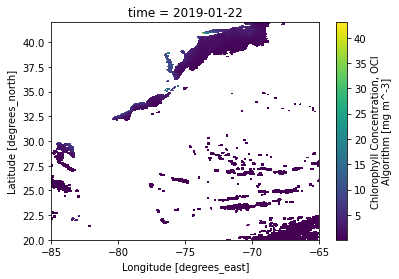

In [245]:
chla_ds.chlor_a[21].plot()

In [246]:
chla_3d = chla_ds.resample(time='8D').mean()

In [247]:
chla_3d

,Array,Chunk
Bytes,50.69 MB,253.44 kB
Shape,"(50, 528, 480)","(1, 264, 240)"
Count,5749 Tasks,200 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,307.20 kB,6.14 kB
Shape,"(50, 3, 256)","(1, 3, 256)"
Count,1438 Tasks,50 Chunks
Type,float64,numpy.ndarray


In [59]:
chla_3d.chlor_a.hvplot.quadmesh(
    'lon', 'lat', projection=proj, project=True,
    cmap='jet', dynamic=True, coastline=True, 
    frame_width=500, logz=True, clim=(0.01,2), datashade=True)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


:DynamicMap   [time]
   :Overlay
      .RGB.I       :RGB   [lon,lat]   (R,G,B,A)
      .Coastline.I :Feature   [Longitude,Latitude]

In [248]:
# interpolate them to match...
interp_bathy = bathy_gs.interp(lat=chla_ds["lat"], lon=chla_ds["lon"])
interp_bathy

<xarray.Dataset>
Dimensions:    (lat: 528, lon: 480)
Coordinates:
  * lat        (lat) float32 41.979164 41.9375 41.895832 ... 20.062498 20.020832
  * lon        (lon) float32 -84.979164 -84.9375 ... -65.0625 -65.02083
Data variables:
    elevation  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

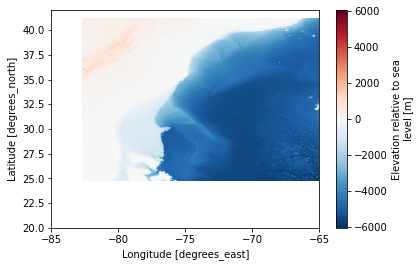

In [249]:
interp_bathy.elevation.plot()

In [292]:
chla_3d = chla_ds.resample(time='3D').mean()
chla_3d['chlor_a'] = chla_3d.chlor_a.where(interp_bathy.elevation < -40) 
chla_3d['chlor_a'] = chla_3d.chlor_a.where(interp_bathy.elevation > -200) 
chla_3d = chla_3d.sel(lat=slice(40,27.5))

In [293]:
chla_3d.chlor_a.hvplot.quadmesh(
    'lon', 'lat', projection=proj, project=True,
    cmap='jet', dynamic=True, coastline=True, 
    frame_width=500, logz=True, clim=(0.01,5), datashade=False)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


:DynamicMap   [time]
   :Overlay
      .QuadMesh.I  :QuadMesh   [lon,lat]   (chlor_a)
      .Coastline.I :Feature   [Longitude,Latitude]

In [295]:
chla_hovmoller.chlor_a.hvplot.quadmesh(
    'time', 'lat',
    frame_width=500, frame_height=600, logz=True, clim=(0.01,2), datashade=False,cmap='jet')

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


:QuadMesh   [time,lat]   (chlor_a)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


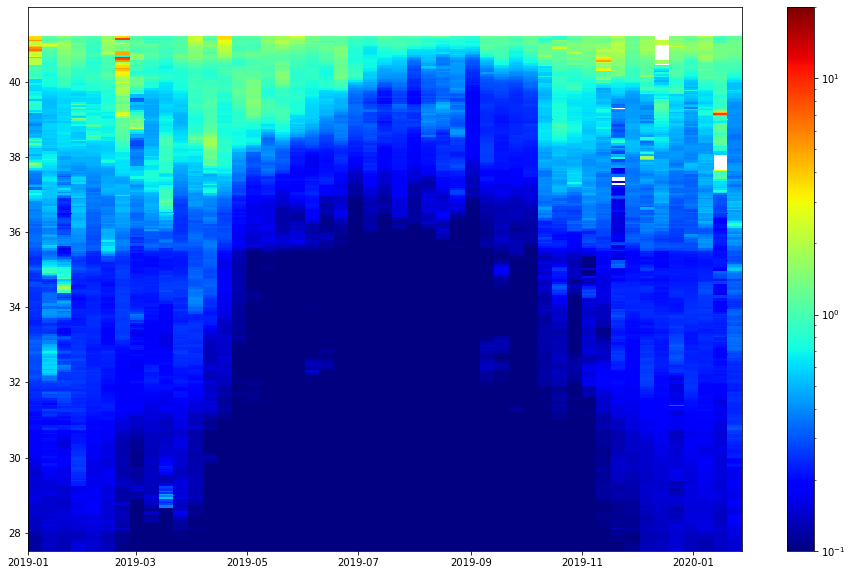

In [274]:
import matplotlib
chla_hovmoller = chla_3d.mean(dim='lon', skipna=True).sel(lat=slice(42,27.5))
fig,ax = plt.subplots(figsize=(16,10))
im = ax.pcolor(chla_hovmoller.time, chla_hovmoller.lat, chla_hovmoller.chlor_a.T, vmax=20, vmin=0.1, cmap='jet',norm=matplotlib.colors.LogNorm())
fig.colorbar(im)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


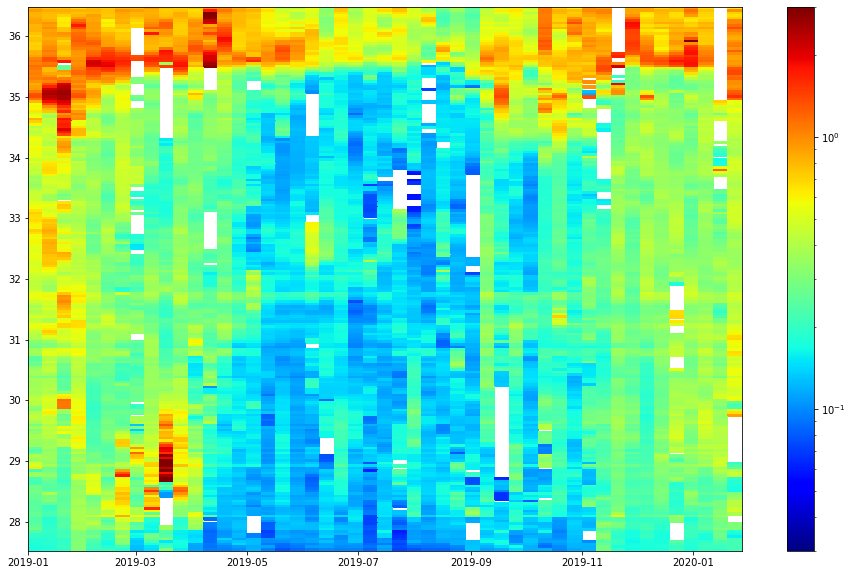

In [269]:
import matplotlib
chla_hovmoller = chla_3d.mean(dim='lon', skipna=True).sel(lat=slice(36.5,27.5))
fig,ax = plt.subplots(figsize=(16,10))
im = ax.pcolor(chla_hovmoller.time, chla_hovmoller.lat, chla_hovmoller.chlor_a.T, vmax=3, vmin=0.03, cmap='jet',norm=matplotlib.colors.LogNorm())
fig.colorbar(im)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


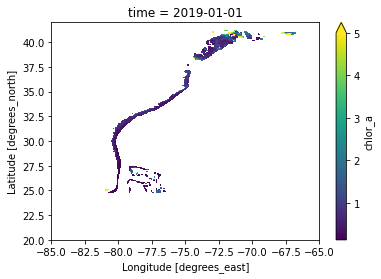

In [134]:
chla_3d.chlor_a[0].plot(vmax=5)

In [172]:
ds = xr.open_dataset('aviso/dataset-duacs-rep-global-merged-allsat-phy-l4_1603205725460.nc')
aviso_gs = ds.sel(latitude=slice(20, 42), longitude=slice(275,295))
aviso_gs

<xarray.Dataset>
Dimensions:    (latitude: 63, longitude: 68, time: 1749)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2019-10-15
  * latitude   (latitude) float32 26.125 26.375 26.625 ... 41.125 41.375 41.625
  * longitude  (longitude) float32 278.125 278.375 278.625 ... 294.625 294.875
Data variables:
    adt        (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2020-03-13T10:01:53Z
    date_issued:                     2020-03-13T10:01:53Z
    date_modified:                   2020-03-13T10:01:53Z
    geospatial_lat_max:              41.625
    geospatial_lat_min:              26.125
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              -0.125
    geospatial_lon_min:              -81.875
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2020-03-13 10:01:55Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika Drifting Phase, Cryosat-2, Haiyan...
    processing_level:                L4
    product_version:                 2020
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.3_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-10-15T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-10-15T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

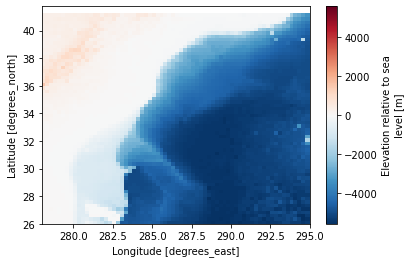

In [178]:
interp_bathy = bathy_gs.interp(lat=aviso_gs["latitude"], lon=aviso_gs["longitude"]-360)
interp_bathy.elevation.plot()

In [230]:
aviso_gs = ds.sel(latitude=slice(20, 42), longitude=slice(275,295))
aviso_gs['sla'] = aviso_gs.sla.where(interp_bathy.elevation < -40) 
aviso_gs['sla'] = aviso_gs.sla.where(interp_bathy.elevation > -1000) 

aviso_gs.sla.hvplot.quadmesh(
    'longitude', 'latitude', projection=proj, project=True,
    cmap='bwr', dynamic=True, coastline=True, 
    frame_width=500,clim=(-0.3,0.3), datashade=False)

:DynamicMap   [time]
   :Overlay
      .QuadMesh.I  :QuadMesh   [longitude,latitude]   (sla)
      .Coastline.I :Feature   [Longitude,Latitude]

In [231]:
aviso_gs

<xarray.Dataset>
Dimensions:    (latitude: 63, longitude: 68, time: 1749)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2019-10-15
  * latitude   (latitude) float32 26.125 26.375 26.625 ... 41.125 41.375 41.625
  * longitude  (longitude) float32 278.125 278.375 278.625 ... 294.625 294.875
    lat        (latitude) float32 26.125 26.375 26.625 ... 41.125 41.375 41.625
    lon        (longitude) float32 -81.875 -81.625 -81.375 ... -65.375 -65.125
Data variables:
    adt        (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2020-03-13T10:01:53Z
    date_issued:                     2020-03-13T10:01:53Z
    date_modified:                   2020-03-13T10:01:53Z
    geospatial_lat_max:              41.625
    geospatial_lat_min:              26.125
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              -0.125
    geospatial_lon_min:              -81.875
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2020-03-13 10:01:55Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika Drifting Phase, Cryosat-2, Haiyan...
    processing_level:                L4
    product_version:                 2020
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.3_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-10-15T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-10-15T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [232]:
aviso_gs.mean(dim='longitude', skipna=True).sel(latitude=slice(27.5,36.5)).isel(time=slice(1200,1700))

<xarray.Dataset>
Dimensions:   (latitude: 36, time: 500)
Coordinates:
  * time      (time) datetime64[ns] 2018-04-15 2018-04-16 ... 2019-08-27
  * latitude  (latitude) float32 27.625 27.875 28.125 ... 35.875 36.125 36.375
    lat       (latitude) float32 27.625 27.875 28.125 ... 35.875 36.125 36.375
Data variables:
    adt       (time, latitude) float64 0.6534 0.6641 0.6811 ... 0.8767 0.8845
    err       (time, latitude) float64 0.01604 0.01565 ... 0.02965 0.03076
    sla       (time, latitude) float64 -0.002514 -0.0109 ... 0.135 0.1481

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


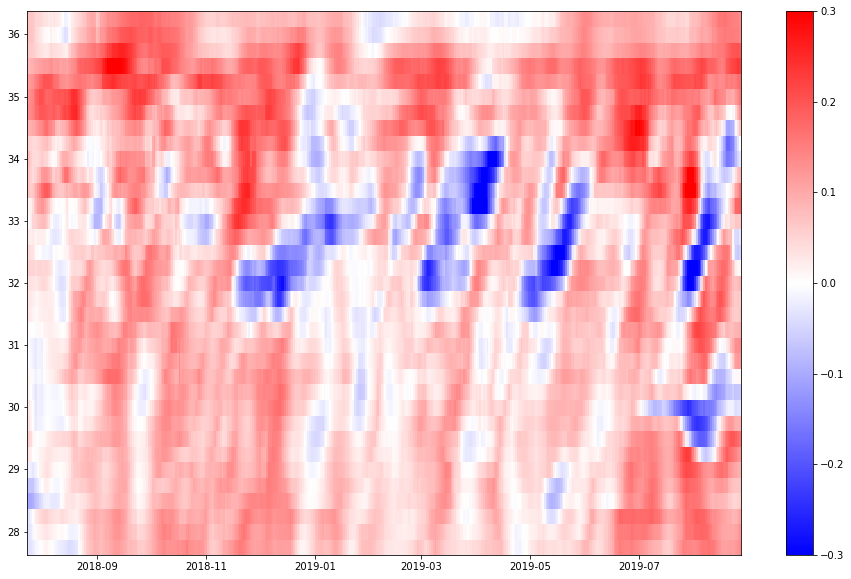

In [243]:
import matplotlib
aviso_hovmoller = aviso_gs.min(dim='longitude', skipna=True).sel(latitude=slice(27.5,36.5)).isel(time=slice(1300,1700))
fig,ax = plt.subplots(figsize=(16,10))
im = ax.pcolor(aviso_hovmoller.time, aviso_hovmoller.latitude, aviso_hovmoller.sla.T,vmin=-0.3,vmax=0.3, cmap='bwr')
fig.colorbar(im)